# core

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
def foo():
    pass

In [ ]:
#| hide
import nbdev

nbdev.nbdev_export()

# Imports

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(context="poster")

In [ ]:
raw = pd.read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-06-06/owid-energy.csv"
)

In [ ]:
# from raw to cleaned
def raw_to_clean(raw):
    return raw.dropna(
        how="all",
        subset=[
            col
            for col in raw.columns
            if col not in ["country", "year", "primary_energy_consumption"]
        ],
    )


df = raw_to_clean(raw)

In [ ]:
print("Number of nulls before:", raw.isnull().sum().sum())
df = raw_to_clean(raw)
print("Number of nulls after:", df.isnull().sum().sum())

Number of nulls before: 1908417
Number of nulls after: 1904637


In [ ]:
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,AFG,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,AFG,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
raw.shape

(21890, 129)

In [ ]:
df.shape

(21890, 129)

In [ ]:
df["country"].value_counts()

Bulgaria                     123
Denmark                      123
Poland                       123
Portugal                     123
Belgium                      123
                            ... 
Serbia and Montenegro         14
West Germany (EIA)            10
East Germany (EIA)            10
South Sudan                   10
Hawaiian Trade Zone (EIA)      6
Name: country, Length: 306, dtype: int64

In [ ]:
countries = df[df["country"].str.contains("Germ")]["country"].unique()
countries

array(['East Germany (EIA)', 'Germany', 'West Germany (EIA)'],
      dtype=object)

In [ ]:
countries = ["East Germany (EIA)", "West Germany (EIA)"]

In [ ]:
df[df["country"] == "East Germany (EIA)"].dropna(how="all", subset=["iso_code"]).head(
    20
)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy


In [ ]:
cols_to_check = [col for col in raw.columns if col not in ["country", "year"]]
print(raw[cols_to_check].isnull().all(axis=1).sum())

0


In [ ]:
for col in df.columns:
    if df.iloc[5693][col] is not pd.NA:
        print(col, df.iloc[5693][col])

country East Germany (EIA)
year 1980
iso_code nan
population nan
gdp nan
biofuel_cons_change_pct nan
biofuel_cons_change_twh nan
biofuel_cons_per_capita nan
biofuel_consumption nan
biofuel_elec_per_capita nan
biofuel_electricity nan
biofuel_share_elec nan
biofuel_share_energy nan
carbon_intensity_elec nan
coal_cons_change_pct nan
coal_cons_change_twh nan
coal_cons_per_capita nan
coal_consumption nan
coal_elec_per_capita nan
coal_electricity nan
coal_prod_change_pct nan
coal_prod_change_twh nan
coal_prod_per_capita nan
coal_production nan
coal_share_elec nan
coal_share_energy nan
electricity_demand nan
electricity_generation nan
electricity_share_energy nan
energy_cons_change_pct nan
energy_cons_change_twh nan
energy_per_capita nan
energy_per_gdp nan
fossil_cons_change_pct nan
fossil_cons_change_twh nan
fossil_elec_per_capita nan
fossil_electricity nan
fossil_energy_per_capita nan
fossil_fuel_consumption nan
fossil_share_elec nan
fossil_share_energy nan
gas_cons_change_pct nan
gas_cons_

In [ ]:
for x in df.iloc[5693]:
    print(x)

East Germany (EIA)
1980
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1734.546
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [ ]:
for x in df.iloc[5693]:
    if x:
        print(x, x.index)

East Germany (EIA) <built-in method index of str object>


AttributeError: 'numpy.int64' object has no attribute 'index'

In [ ]:
df[df["country"] == "East Germany (EIA)"].head(20)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
5693,East Germany (EIA),1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5694,East Germany (EIA),1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5695,East Germany (EIA),1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5696,East Germany (EIA),1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5697,East Germany (EIA),1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5698,East Germany (EIA),1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5699,East Germany (EIA),1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5700,East Germany (EIA),1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5701,East Germany (EIA),1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5702,East Germany (EIA),1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


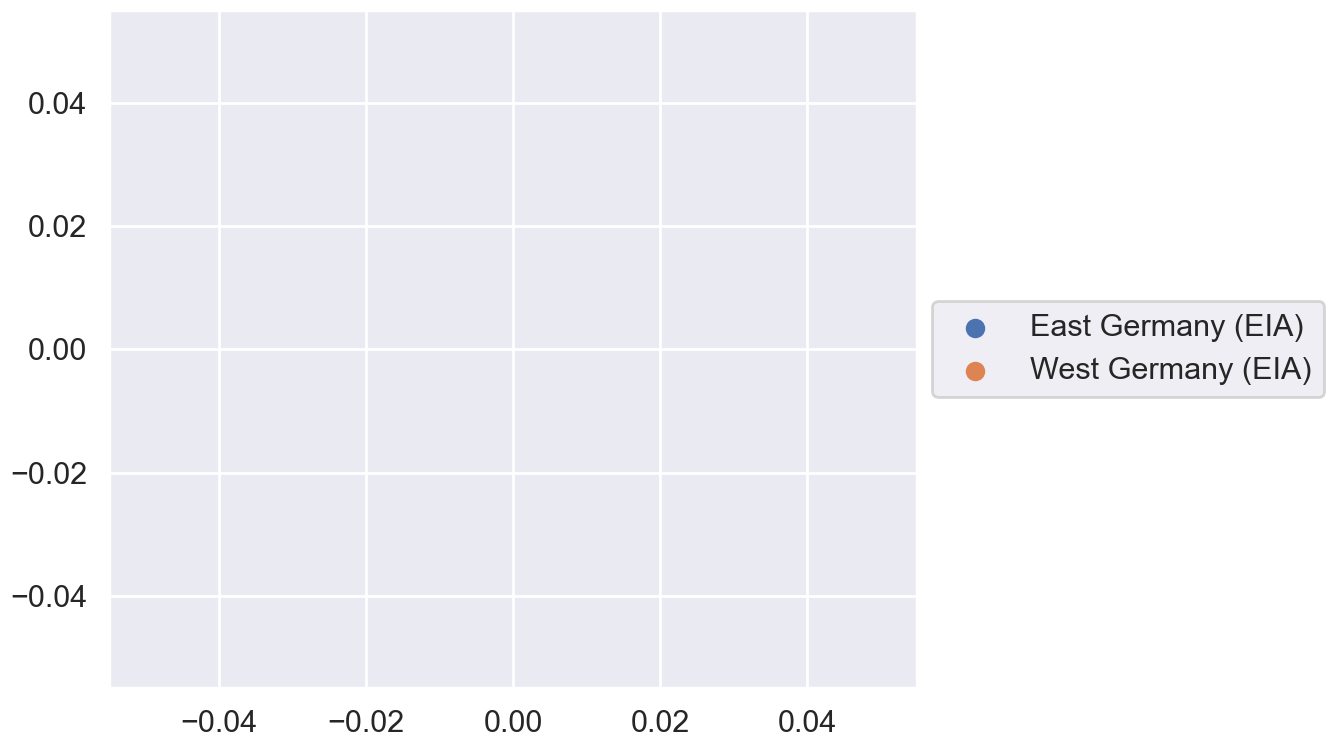

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor("w")
for country in countries:
    plotdf = df[df["country"] == country]
    ax.scatter(plotdf["year"], plotdf["population"], label=country)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))


fig.tight_layout()